# Análise de Dados de Luz
### Dados de julho de 2024 a julho de 2025

### Objetivo do Trabalho
  
O objetivo deste trabalho é análisar o consumo de energia em relação a temperatura média(madrugada, manhã, tarde e noite) do mês e em relação a estação do mês.  
  
Procuro vê se o consumo tem alguma coisa a ver com meses mais quentes ou mais frios e explorar hábitos que se tornam mais frequentes nesses meses.  
  
### Detalhes do Trabalho
  
O consumo de energia é o da minha casa com 4 pessoas adultas morando nela.  

Os hábitos discultidos aqui serão referentes aos hábitos da minha casa, logo não são dados que podemos inferir algo em relação a uma população ou amostra maior, para isso seriam necessário dados de diferentes famílias, de diferentes tamanhos e de diferentes regiões.  

Uso diário de forno elétrico, microondas, televisão, carregador de celular.
2x na semana de máquina de lavar.
Ar-condicionado nos dias mais quentes
Chuveiro elétrico 2x dia por pessoa.



Para definir as estações dos meses eu levei em consideração quantos dias dos meses fazem parte de determinada estação, pois alguns meses participam de duas estações. Por exemplo, se um mês X tem 20 dias de verão a estação do mês X será verão. Fiz isso para facilitar minha análise, pois tenho só dados mensais do consumo de energia e não diários.

Como intervalo de tempo para definir a madrugada, manhã, tarde e a noite usei o seguinte parâmetro:

1. 00:00 às 06:00 -> Madrugada
2. 07:00 às 12:00 -> Manhã
3. 13:00 às 18:00 -> Tarde
4. 19:00 às 23:00 -> Noite

Obs: Os dados de temperatura são medidos de hora em hora por dia.

Os dados referentes a temperaturas da minha região baixei do INMET referente aos dados de DF de 07-2024 a 07-2025: *tempo.inmet.gov.br/TabelaEstacoes*




### O que eu faço nesse trabalho:

1. Junto os dados das tabelas de temperatura em uma tabela só.
2. Vejo se tem alguma coisa de errada na tabela(dados vazios), mal formatados,etc e faço as devidas correções.
3. Defino intervalos do dia(madrugada, manhã, tarde e noite) e calculo, para cada mês, as temperatura média nesses intervalos.
4. Monto graficos para cada mês das temperaturas e do consumo.
5. Analiso os dados levando em consideração hábitos da casa e levanto hipóteses e soluções.

### Bibliotecas

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Carrego  dados de temperatura

In [19]:
data = pd.read_csv("dados temp julho 2024 a julho 2025/temp jul 2025.csv", sep = ";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  744 non-null    object
 1   Hora (UTC)            744 non-null    int64 
 2   Temp. Ins. (C)        744 non-null    object
 3   Temp. Max. (C)        744 non-null    object
 4   Temp. Min. (C)        744 non-null    object
 5   Umi. Ins. (%)         744 non-null    object
 6   Umi. Max. (%)         744 non-null    object
 7   Umi. Min. (%)         744 non-null    object
 8   Pto Orvalho Ins. (C)  744 non-null    object
 9   Pto Orvalho Max. (C)  744 non-null    object
 10  Pto Orvalho Min. (C)  744 non-null    object
 11  Pressao Ins. (hPa)    744 non-null    object
 12  Pressao Max. (hPa)    744 non-null    object
 13  Pressao Min. (hPa)    744 non-null    object
 14  Vel. Vento (m/s)      744 non-null    object
 15  Dir. Vento (m/s)      744 non-null    ob

In [20]:
data2 = pd.read_csv("dados temp julho 2024 a julho 2025/temp jul 2024 a dez 2024.csv",sep = ";")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  4416 non-null   object
 1   Hora (UTC)            4416 non-null   int64 
 2   Temp. Ins. (C)        4400 non-null   object
 3   Temp. Max. (C)        4400 non-null   object
 4   Temp. Min. (C)        4400 non-null   object
 5   Umi. Ins. (%)         4400 non-null   object
 6   Umi. Max. (%)         4400 non-null   object
 7   Umi. Min. (%)         4399 non-null   object
 8   Pto Orvalho Ins. (C)  4400 non-null   object
 9   Pto Orvalho Max. (C)  4400 non-null   object
 10  Pto Orvalho Min. (C)  4400 non-null   object
 11  Pressao Ins. (hPa)    4402 non-null   object
 12  Pressao Max. (hPa)    4402 non-null   object
 13  Pressao Min. (hPa)    4402 non-null   object
 14  Vel. Vento (m/s)      4401 non-null   object
 15  Dir. Vento (m/s)      4400 non-null   

In [21]:
data3 = pd.read_csv("dados temp julho 2024 a julho 2025/tem jan 2025 a jun 2025.csv", sep  = ";")
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  4344 non-null   object
 1   Hora (UTC)            4344 non-null   int64 
 2   Temp. Ins. (C)        4331 non-null   object
 3   Temp. Max. (C)        4331 non-null   object
 4   Temp. Min. (C)        4331 non-null   object
 5   Umi. Ins. (%)         4331 non-null   object
 6   Umi. Max. (%)         4331 non-null   object
 7   Umi. Min. (%)         4331 non-null   object
 8   Pto Orvalho Ins. (C)  4331 non-null   object
 9   Pto Orvalho Max. (C)  4331 non-null   object
 10  Pto Orvalho Min. (C)  4331 non-null   object
 11  Pressao Ins. (hPa)    4331 non-null   object
 12  Pressao Max. (hPa)    4331 non-null   object
 13  Pressao Min. (hPa)    4331 non-null   object
 14  Vel. Vento (m/s)      4331 non-null   object
 15  Dir. Vento (m/s)      4331 non-null   

### Transformando os dados

Primeiro vou concatenar todas as tabelas em um único dataset.

In [22]:
df = pd.concat([data,data2,data3], ignore_index= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  9504 non-null   object
 1   Hora (UTC)            9504 non-null   int64 
 2   Temp. Ins. (C)        9475 non-null   object
 3   Temp. Max. (C)        9475 non-null   object
 4   Temp. Min. (C)        9475 non-null   object
 5   Umi. Ins. (%)         9475 non-null   object
 6   Umi. Max. (%)         9475 non-null   object
 7   Umi. Min. (%)         9474 non-null   object
 8   Pto Orvalho Ins. (C)  9475 non-null   object
 9   Pto Orvalho Max. (C)  9475 non-null   object
 10  Pto Orvalho Min. (C)  9475 non-null   object
 11  Pressao Ins. (hPa)    9477 non-null   object
 12  Pressao Max. (hPa)    9477 non-null   object
 13  Pressao Min. (hPa)    9477 non-null   object
 14  Vel. Vento (m/s)      9476 non-null   object
 15  Dir. Vento (m/s)      9475 non-null   

Agora vou dropar as colunas que não irei usar.

Nesse trabalho usei as coluna referente a Data,Hora Temperatura e Umidade

In [23]:
colunas_usadas = ["Data","Hora (UTC)","Temp. Ins. (C)","Umi. Ins. (%)"]

df = df[colunas_usadas]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data            9504 non-null   object
 1   Hora (UTC)      9504 non-null   int64 
 2   Temp. Ins. (C)  9475 non-null   object
 3   Umi. Ins. (%)   9475 non-null   object
dtypes: int64(1), object(3)
memory usage: 297.1+ KB


Como tem poucos valores vazios, acredito que tirá-los não vai interferir muito na minha análise.

In [24]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9475 entries, 0 to 9503
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data            9475 non-null   object
 1   Hora (UTC)      9475 non-null   int64 
 2   Temp. Ins. (C)  9475 non-null   object
 3   Umi. Ins. (%)   9475 non-null   object
dtypes: int64(1), object(3)
memory usage: 370.1+ KB


Agora eu vou transformar os tipos de dados de data(objetc -> datetime) , temp(object -> float) e umidade(object -> float), e também troco as vírgulas por pontos.

In [25]:
df["Data"] = pd.to_datetime(df["Data"], format="%d/%m/%Y")
df["Temp. Ins. (C)"] = df["Temp. Ins. (C)"].str.replace(",",".")
df["Temp. Ins. (C)"] = pd.to_numeric(df["Temp. Ins. (C)"])
df["Umi. Ins. (%)"] = df["Umi. Ins. (%)"].str.replace(",",".")
df["Umi. Ins. (%)"] = pd.to_numeric(df["Umi. Ins. (%)"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9475 entries, 0 to 9503
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data            9475 non-null   datetime64[ns]
 1   Hora (UTC)      9475 non-null   int64         
 2   Temp. Ins. (C)  9475 non-null   float64       
 3   Umi. Ins. (%)   9475 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 370.1 KB


Ordeno os dados

In [26]:
df = df.sort_values(by=["Data", "Hora (UTC)"])
df.head()

,Data,Hora (UTC),Temp. Ins. (C),Umi. Ins. (%)
744,2024-07-01,0,19.4,36.0
745,2024-07-01,100,15.2,55.0
746,2024-07-01,200,14.6,58.0
747,2024-07-01,300,18.3,46.0
748,2024-07-01,400,18.6,46.0


Salvo os dados em uma tabela

In [27]:
df.to_csv("dataset.csv",index=False)

Agora crio uma coluna com o período do dia

In [28]:
def periodo(h):
    if 0 <= h <= 600:
        return "Madrugada"
    elif 700 <= h <= 1200:
        return "Manhã"
    elif 1300 <= h <= 1800:
        return "Tarde"
    elif 1900 <= h <= 2300:
        return "Noite"
    else:
        return None  

df["Periodo"] = df["Hora (UTC)"].apply(periodo)

df["Periodo"].unique()

array(['Madrugada', 'Manhã', 'Tarde', 'Noite'], dtype=object)

Como não tem nenhum valor "None" em Período então assumo que todas as horas se encaixaram em algum período

Agora crio uma coluna para indicar o ano e mês daquela medida

In [29]:
df["AnoMes"] = df["Data"].dt.strftime("%Y-%m")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9475 entries, 744 to 743
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data            9475 non-null   datetime64[ns]
 1   Hora (UTC)      9475 non-null   int64         
 2   Temp. Ins. (C)  9475 non-null   float64       
 3   Umi. Ins. (%)   9475 non-null   float64       
 4   Periodo         9475 non-null   object        
 5   AnoMes          9475 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 518.2+ KB


Calculo as médias das temperaturas e umidades por mês

In [30]:
medias = (
    df.groupby(["AnoMes", "Periodo"])
      [["Temp. Ins. (C)", "Umi. Ins. (%)"]]
      .mean()
      .reset_index()
)
medias.head()


,AnoMes,Periodo,Temp. Ins. (C),Umi. Ins. (%)
0,2024-07,Madrugada,16.996279,61.474419
1,2024-07,Manhã,15.922951,67.000000
2,2024-07,Noite,22.822078,39.415584
3,2024-07,Tarde,24.232258,37.505376
4,2024-08,Madrugada,18.736150,51.521127


Agora adiciono as médias na tabela final

In [31]:

consumo = pd.read_csv("dados consumo luz julho 2024 a julho 2025/consumo.csv")

temp_pivot = medias.pivot_table(
    index="AnoMes",
    columns="Periodo",
    values="Temp. Ins. (C)"
).reset_index()
# Renomear colunas para ficar claro
temp_pivot.columns = ["AnoMes"] + [f"Temp_{p}" for p in temp_pivot.columns[1:]]

temp_pivot.head()


,AnoMes,Temp_Madrugada,Temp_Manhã,Temp_Noite,Temp_Tarde
0,2024-07,16.996279,15.922951,22.822078,24.232258
1,2024-08,18.736150,16.787027,24.812258,25.687097
2,2024-09,22.438756,20.926111,28.076000,29.395000
3,2024-10,21.176389,21.195699,24.654194,26.791398
4,2024-11,19.781429,19.970556,22.528000,24.525556


Faço o mesmo para a Umidade, calculo as médias mês a mês de acordo com cada período(Manhã,Tarde,Noite e Madrugada)

In [32]:
# Pivot para Umi. Ins (%)
umi_pivot = medias.pivot_table(
    index="AnoMes",
    columns="Periodo",
    values="Umi. Ins. (%)"
).reset_index()

umi_pivot.columns = ["AnoMes"] + [f"Umi_{p}" for p in umi_pivot.columns[1:]]


umi_pivot.head()

,AnoMes,Umi_Madrugada,Umi_Manhã,Umi_Noite,Umi_Tarde
0,2024-07,61.474419,67.000000,39.415584,37.505376
1,2024-08,51.521127,61.432432,32.070968,34.446237
2,2024-09,37.339713,44.161111,23.106667,22.944444
3,2024-10,75.648148,75.306452,62.000000,54.005376
4,2024-11,91.366667,88.766667,77.346667,68.233333


Aqui eu adiciono as médias de temperatura e umidade(por período) a tabela de consumo e monto uma tabela final na qual estarei analisando os dados com todas as médias por período de temperatura e umidade e dados sobre o consumo

A tabela final com todos os dados analisado é "consumo_completo.csv"

In [ ]:
medias_final = pd.merge(temp_pivot, umi_pivot, on="AnoMes")

consumo_completo = consumo.merge(medias_final, on="AnoMes", how="left")
#Pego as colunas de temperatura e umidade para arredondar as casas decimais
colunas_temp_umi = [col for col in consumo_completo.columns if col.startswith("Temp_") or col.startswith("Umi_")]

# Arredondo para 2 casas decimais
consumo_completo[colunas_temp_umi] = consumo_completo[colunas_temp_umi].round(2)

# Salvo o resultado
consumo_completo.to_csv("consumo_completo.csv", index=False)

Aqui eu vejo médias, desvio padrão(std), valores mínimos, máximos e os quartis. Lembrando que esses valores das colunas de temperatura e umidade são médias dos dias do mês.

In [34]:
consumo_completo.describe()

,Qnt Dias,Consumo,Temp_Madrugada,Temp_Manhã,Temp_Noite,Temp_Tarde,Umi_Madrugada,Umi_Manhã,Umi_Noite,Umi_Tarde
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,30.307692,684.538462,19.455385,18.776154,23.791538,25.289231,74.221538,77.330769,56.429231,52.053077
std,1.887883,79.428810,1.709686,2.149518,1.655556,1.674950,16.530162,13.449937,17.416716,14.255399
min,28.000000,612.000000,16.830000,15.240000,22.180000,23.370000,37.340000,44.160000,23.110000,22.940000
25%,28.000000,632.000000,18.080000,16.790000,22.530000,24.230000,62.710000,70.370000,41.650000,39.720000
50%,31.000000,660.000000,19.810000,19.970000,23.150000,25.160000,80.260000,82.960000,62.000000,55.270000
75%,32.000000,704.000000,20.550000,20.190000,24.810000,26.120000,87.610000,85.690000,72.000000,62.560000
max,33.000000,905.000000,22.440000,21.200000,28.080000,29.400000,91.370000,90.340000,77.350000,68.230000


Aqui eu vejo se tenho outliers no consumo

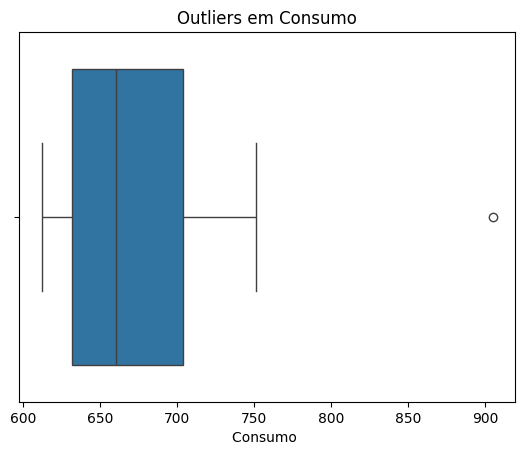

In [35]:
sns.boxplot(x=consumo_completo["Consumo "])
plt.title("Outliers em Consumo")
plt.show()

Decido não tirar os outliers, pois ele dá um certo insight sobre o consumo.

### Interpretando os dados

O consumo mês a mês, o consumo maior foi de outubro de 2024 seguido por setembro de 2024.

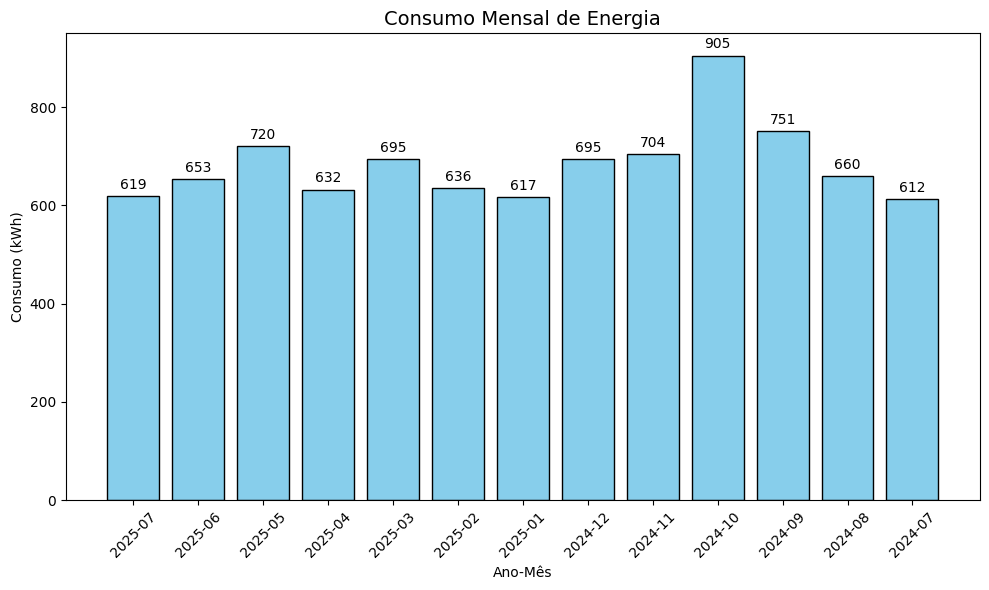

In [36]:
plt.figure(figsize=(10, 6))
bars = plt.bar(consumo_completo["AnoMes"], consumo_completo["Consumo "], color="skyblue", edgecolor="black")
plt.bar_label(bars, fmt='%d', padding=3)
plt.title("Consumo Mensal de Energia", fontsize=14)
plt.xlabel("Ano-Mês")
plt.ylabel("Consumo (kWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A média das temperaturas por período, os meses de outubro e setembro apresentam maiores temperaturas.

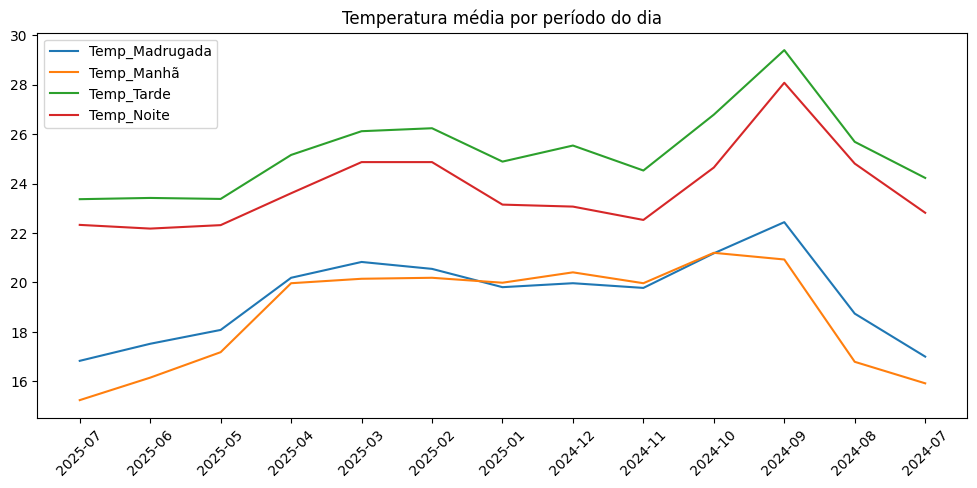

In [37]:
temp_cols = ["Temp_Madrugada","Temp_Manhã","Temp_Tarde","Temp_Noite"]
consumo_completo[temp_cols].plot(figsize=(12,5))
plt.xticks(range(len(consumo_completo["AnoMes"])), consumo_completo["AnoMes"], rotation=45)
plt.title("Temperatura média por período do dia")
plt.show()


A média da umidade por período, os meses de outubro e setembro apresentam as menores umidades.

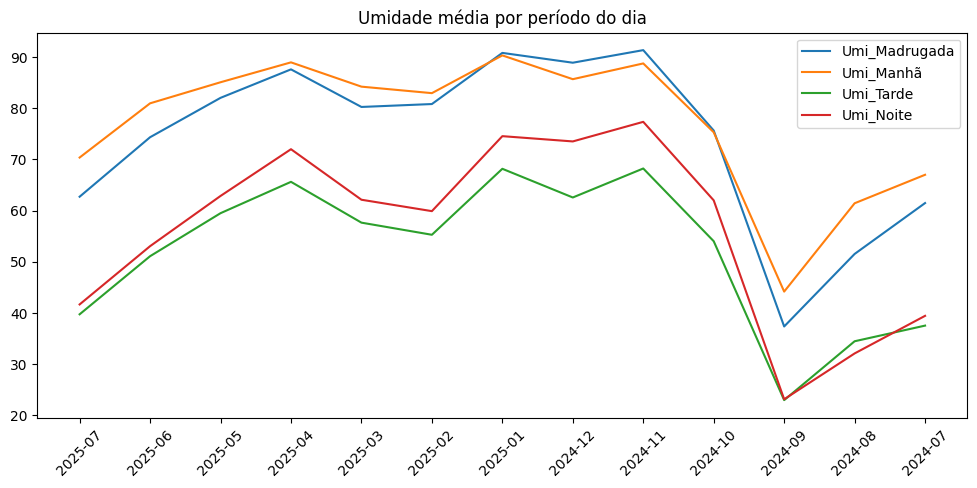

In [38]:
umi_cols = ["Umi_Madrugada","Umi_Manhã","Umi_Tarde","Umi_Noite"]
consumo_completo[umi_cols].plot(figsize=(12,5))
plt.xticks(range(len(consumo_completo["AnoMes"])), consumo_completo["AnoMes"], rotation=45)
plt.title("Umidade média por período do dia")
plt.show()


Aqui eu faço uma média das temperaturas de todos os períodos, o mês mais quente foi setembro de 2024

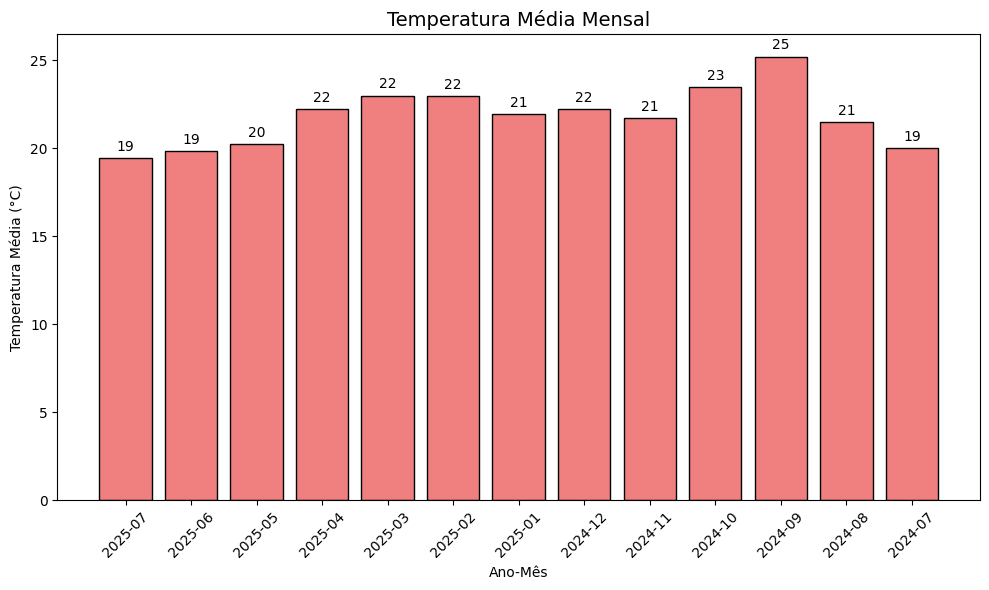

In [39]:
consumo_completo["Temp_Média"] = consumo_completo[["Temp_Madrugada", "Temp_Manhã", "Temp_Noite", "Temp_Tarde"]].mean(axis=1)

plt.figure(figsize=(10, 6))
bars = plt.bar(consumo_completo["AnoMes"], consumo_completo["Temp_Média"], color="lightcoral", edgecolor="black")
plt.bar_label(bars, fmt='%d', padding=3)
plt.title("Temperatura Média Mensal", fontsize=14)
plt.xlabel("Ano-Mês")
plt.ylabel("Temperatura Média (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aqui eu faço uma média da umidade de todos os períodos, o mês mais seco foi setembro de 2024 seguido por agosto de 2024.

Aqui dá para ver também que temos uma umidade alta que se mantêm em novembro, dezembro, janeiro,fevereiro, março e abril .
Então em julho, agosto e setembro temos seca em média. Acredito se tivesse dados de mais anos esse padrão se repetiria.

Também é importante levar em consideração que no final de outubro há bastante chuvas no DF o que ajuda a aumentar a umidade média em outubro.

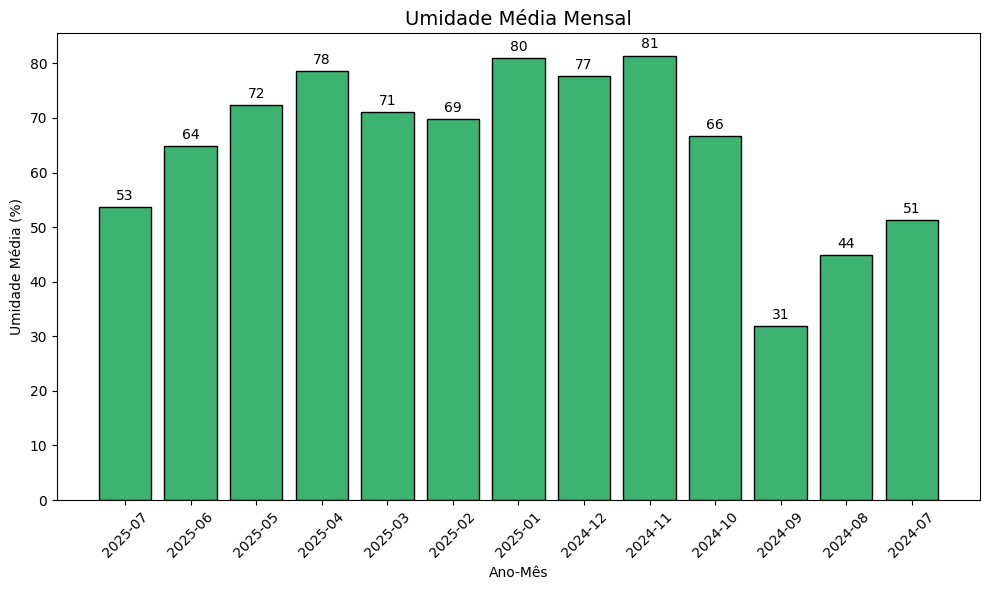

In [40]:
consumo_completo["Umid_Média"] = consumo_completo[["Umi_Madrugada", "Umi_Manhã", "Umi_Noite", "Umi_Tarde"]].mean(axis=1)

plt.figure(figsize=(10, 6))
bars = plt.bar(consumo_completo["AnoMes"], consumo_completo["Umid_Média"], color="mediumseagreen", edgecolor="black")
plt.bar_label(bars, fmt='%d', padding=3)
plt.title("Umidade Média Mensal", fontsize=14)
plt.xlabel("Ano-Mês")
plt.ylabel("Umidade Média (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Na sequência de gráficos a seguir eu mostro o consumo mês a mês, a temperatura em cada períodp e a umidade em cada período. Aparentemente eles não tem muita relação.

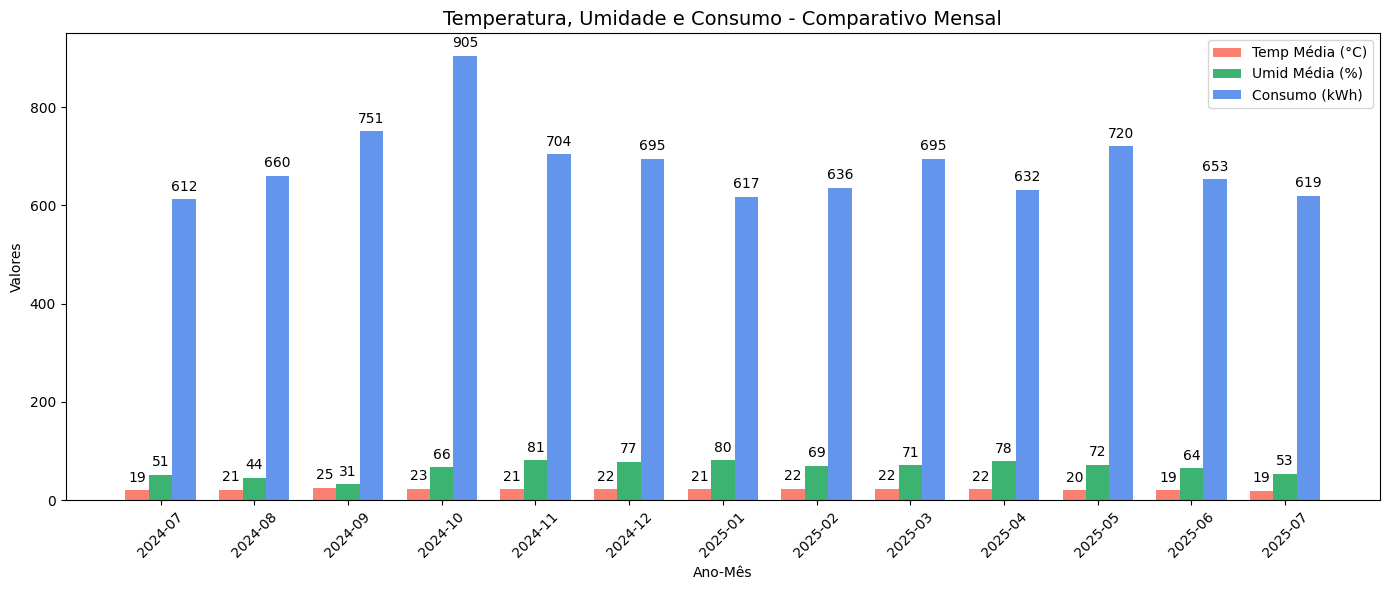

In [41]:
consumo_completo = consumo_completo.sort_values("AnoMes")

# Criar posições para os grupos de barras
x = np.arange(len(consumo_completo["AnoMes"]))  
largura = 0.25  

plt.figure(figsize=(14,6))

# Três conjuntos de barras
b1 = plt.bar(x - largura, consumo_completo["Temp_Média"], width=largura, color="salmon", label="Temp Média (°C)")
b2 = plt.bar(x, consumo_completo["Umid_Média"], width=largura, color="mediumseagreen", label="Umid Média (%)")
b3 = plt.bar(x + largura, consumo_completo["Consumo "], width=largura, color="cornflowerblue", label="Consumo (kWh)")

# Adicionar rótulos no topo das barras
def add_labels(bars):
    plt.bar_label(bars, fmt='%d', padding=4)

add_labels(b1)
add_labels(b2)
add_labels(b3)

# Personalização
plt.title("Temperatura, Umidade e Consumo - Comparativo Mensal", fontsize=14)
plt.xlabel("Ano-Mês")
plt.ylabel("Valores")
plt.xticks(x, consumo_completo["AnoMes"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

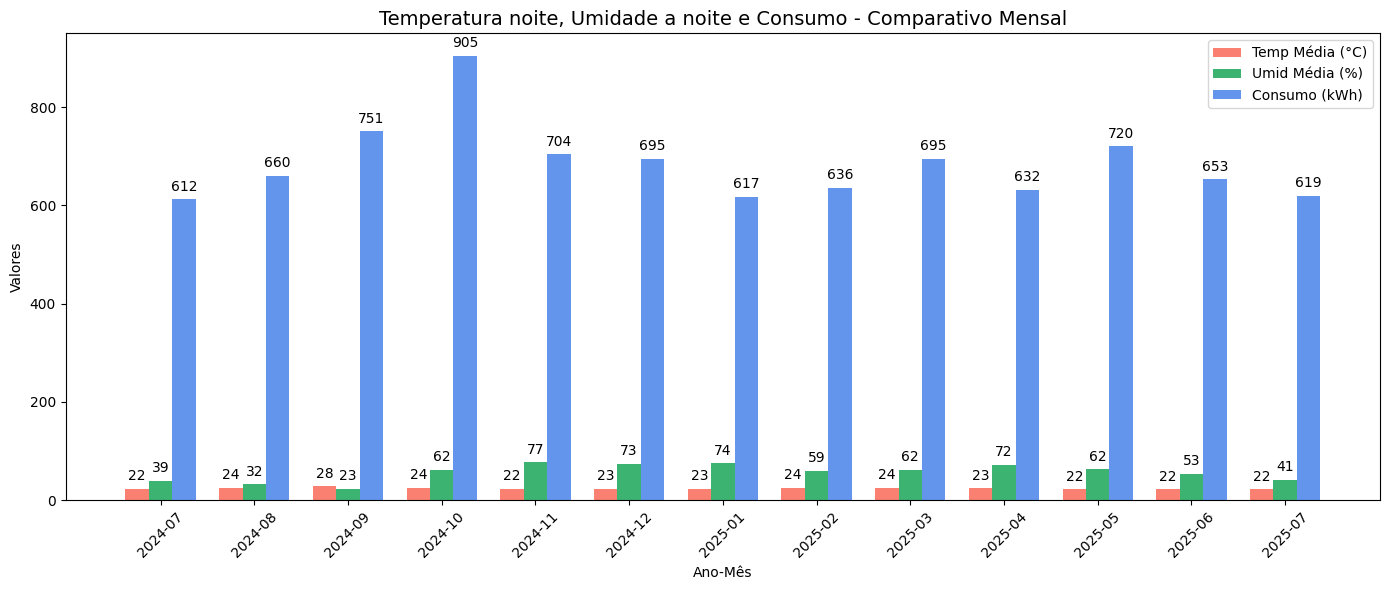

In [42]:
consumo_completo = consumo_completo.sort_values("AnoMes")

# Criar posições para os grupos de barras
x = np.arange(len(consumo_completo["AnoMes"]))  
largura = 0.25  

plt.figure(figsize=(14,6))

# Três conjuntos de barras
b1 = plt.bar(x - largura, consumo_completo["Temp_Noite"], width=largura, color="salmon", label="Temp Média (°C)")
b2 = plt.bar(x, consumo_completo["Umi_Noite"], width=largura, color="mediumseagreen", label="Umid Média (%)")
b3 = plt.bar(x + largura, consumo_completo["Consumo "], width=largura, color="cornflowerblue", label="Consumo (kWh)")

# Adicionar rótulos no topo das barras
def add_labels(bars):
    plt.bar_label(bars, fmt='%d', padding=4)

add_labels(b1)
add_labels(b2)
add_labels(b3)

# Personalização
plt.title("Temperatura noite, Umidade a noite e Consumo - Comparativo Mensal", fontsize=14)
plt.xlabel("Ano-Mês")
plt.ylabel("Valores")
plt.xticks(x, consumo_completo["AnoMes"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

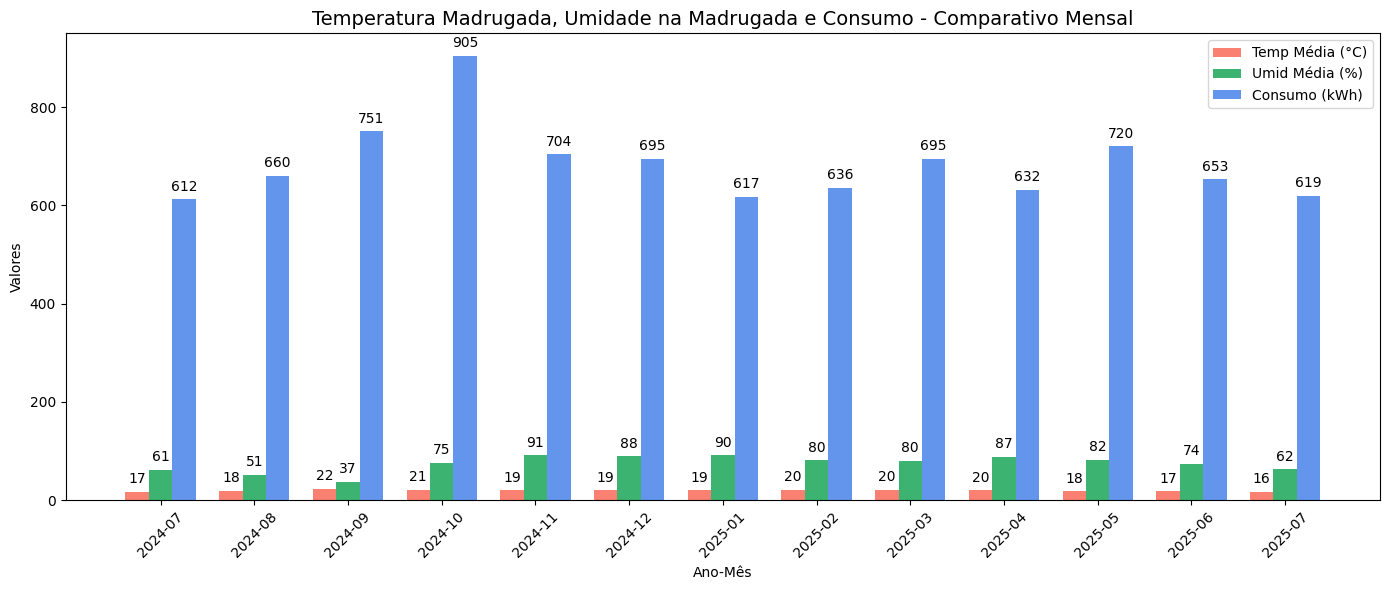

In [43]:
consumo_completo = consumo_completo.sort_values("AnoMes")

# Criar posições para os grupos de barras
x = np.arange(len(consumo_completo["AnoMes"]))  
largura = 0.25  

plt.figure(figsize=(14,6))

# Três conjuntos de barras
b1 = plt.bar(x - largura, consumo_completo["Temp_Madrugada"], width=largura, color="salmon", label="Temp Média (°C)")
b2 = plt.bar(x, consumo_completo["Umi_Madrugada"], width=largura, color="mediumseagreen", label="Umid Média (%)")
b3 = plt.bar(x + largura, consumo_completo["Consumo "], width=largura, color="cornflowerblue", label="Consumo (kWh)")

# Adicionar rótulos no topo das barras
def add_labels(bars):
    plt.bar_label(bars, fmt='%d', padding=4)

add_labels(b1)
add_labels(b2)
add_labels(b3)

# Personalização
plt.title("Temperatura Madrugada, Umidade na Madrugada e Consumo - Comparativo Mensal", fontsize=14)
plt.xlabel("Ano-Mês")
plt.ylabel("Valores")
plt.xticks(x, consumo_completo["AnoMes"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

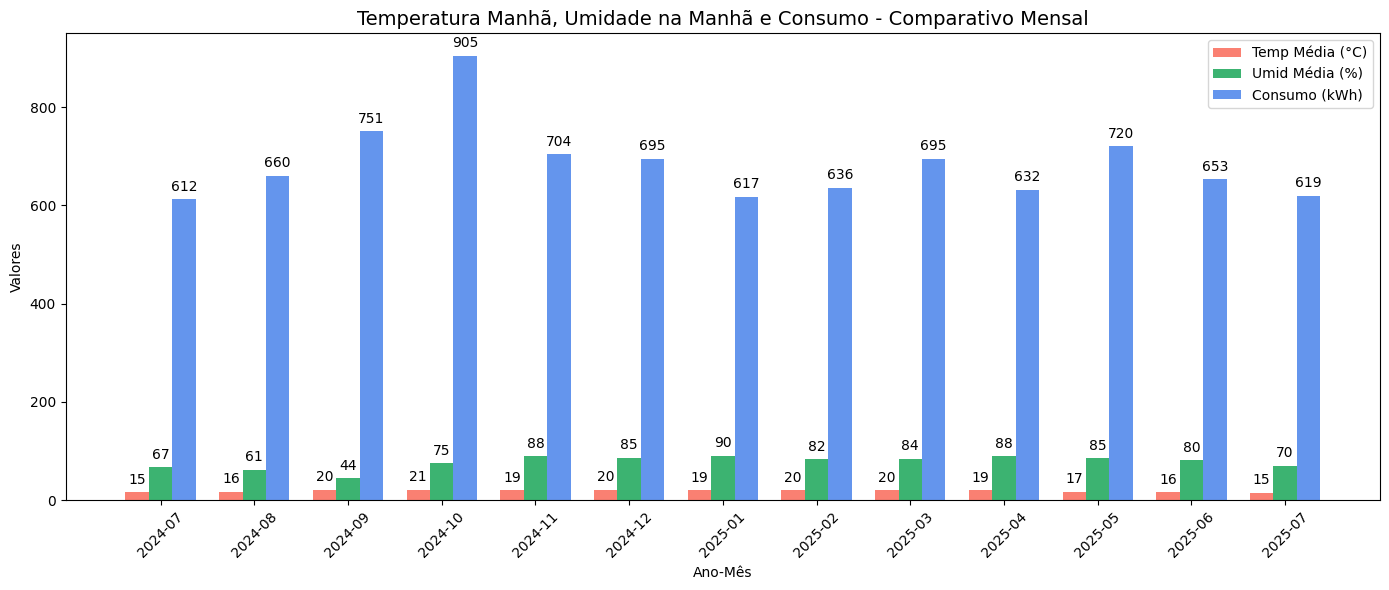

In [44]:
consumo_completo = consumo_completo.sort_values("AnoMes")

# Criar posições para os grupos de barras
x = np.arange(len(consumo_completo["AnoMes"]))  
largura = 0.25  

plt.figure(figsize=(14,6))

# Três conjuntos de barras
b1 = plt.bar(x - largura, consumo_completo["Temp_Manhã"], width=largura, color="salmon", label="Temp Média (°C)")
b2 = plt.bar(x, consumo_completo["Umi_Manhã"], width=largura, color="mediumseagreen", label="Umid Média (%)")
b3 = plt.bar(x + largura, consumo_completo["Consumo "], width=largura, color="cornflowerblue", label="Consumo (kWh)")

# Adicionar rótulos no topo das barras
def add_labels(bars):
    plt.bar_label(bars, fmt='%d', padding=4)

add_labels(b1)
add_labels(b2)
add_labels(b3)

# Personalização
plt.title("Temperatura Manhã, Umidade na Manhã e Consumo - Comparativo Mensal", fontsize=14)
plt.xlabel("Ano-Mês")
plt.ylabel("Valores")
plt.xticks(x, consumo_completo["AnoMes"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

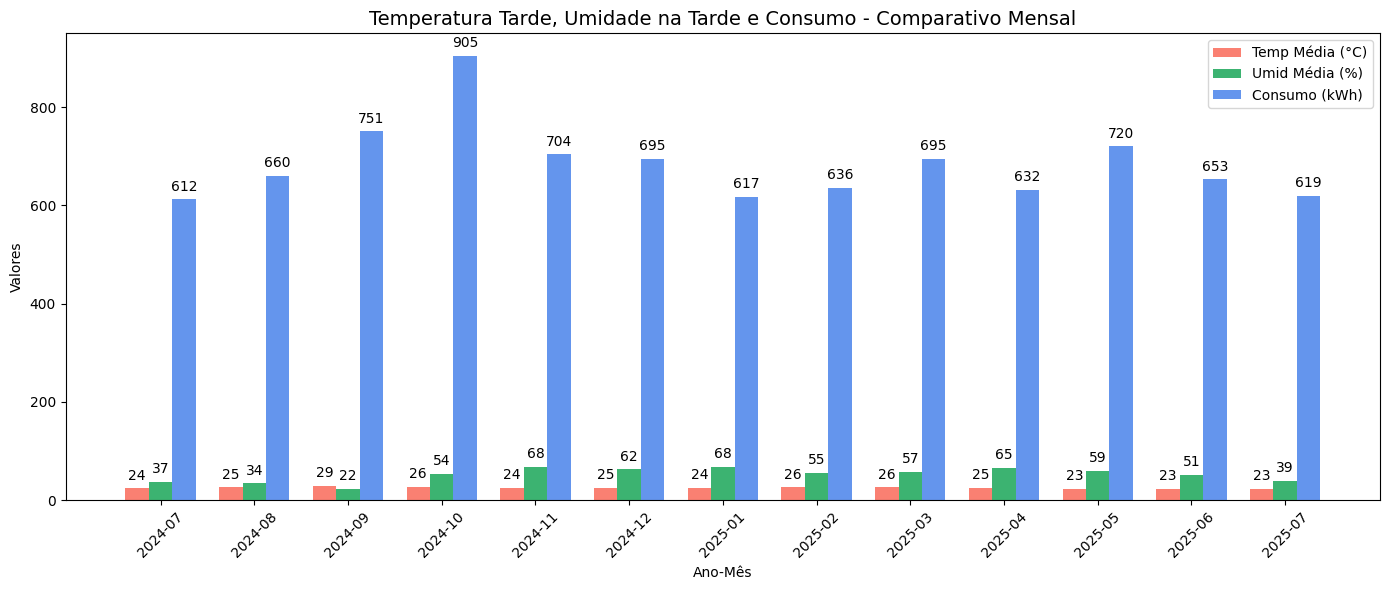

In [45]:
consumo_completo = consumo_completo.sort_values("AnoMes")

# Criar posições para os grupos de barras
x = np.arange(len(consumo_completo["AnoMes"]))  # posições no eixo X
largura = 0.25  # largura de cada barra

plt.figure(figsize=(14,6))

# Três conjuntos de barras
b1 = plt.bar(x - largura, consumo_completo["Temp_Tarde"], width=largura, color="salmon", label="Temp Média (°C)")
b2 = plt.bar(x, consumo_completo["Umi_Tarde"], width=largura, color="mediumseagreen", label="Umid Média (%)")
b3 = plt.bar(x + largura, consumo_completo["Consumo "], width=largura, color="cornflowerblue", label="Consumo (kWh)")

# Adicionar rótulos no topo das barras
def add_labels(bars):
    plt.bar_label(bars, fmt='%d', padding=4)

add_labels(b1)
add_labels(b2)
add_labels(b3)

# Personalização
plt.title("Temperatura Tarde, Umidade na Tarde e Consumo - Comparativo Mensal", fontsize=14)
plt.xlabel("Ano-Mês")
plt.ylabel("Valores")
plt.xticks(x, consumo_completo["AnoMes"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Conclusão

Aparentemente  o consumo de energia da minha casa tem pouca ou nenhuma relação com a temperatura.
Acredito que isso se dê por alguns motivos:

1. Base de dados sobre o consumo limitada.
    Se eu tivesse mais dados sobre o consumo, dados diários de consumo, e dados referentes a mais anos/mais tempo, acredito que essa relação entre temperatura, umidade e consumo de energia se tornaria mais aparente.
  
2. Conhecimento a respeito do consumo
    Apesar de saber como consumo é feito na minha casa e de ter 90% de certeza que o consumo está relacionado com a temperatura e com a umidade, isso é difícil de ver nos dados, pois, dias mais quentes significam mais horas de uso de ar-condicionado, mas também significam banhos frios, o contrário acontece nos dias mais frios, banhos mais quentes e menos uso de ar-condicionado até mesmo sem nenhum uso.  

3. Valores constantes de consumo
    Alguns gastos de energia são constantes na minha casa, como, por exemplo, o uso de geladeira, forno que é elétrico, televisão, carregar telefones, internet, etc. O uso deles é mais ou menos igual todos os dias, por isso que acredito que essa variação de +- 70kWh mês a mês(que é o desvio padrão) venha disso, um uso a mais ou a menos do forno ou da televisão mês a mês, ou talvez o uso com chuveiro seja maior que o do ar-condicionado ou vice-versa.

4. O mês mais quente coincide com o mês mais seco no DF, no caso setembro.

Em suma, acredito se tivesse mais dados sobre o consumo, principalmente dados diários, poderia mostrar uma relação melhor entre temperatura, umidade e consumo de energia.

Também se tivesse dados diários de consumo, poderia ignorar a análise mês a mês que acredito ser tendenciosa, uma vez que muitos meses apresentam uma transição das estações podendo ser ao mesmo tempo um mês seco no começo e chuvoso no final ou o contrário.

Uma forma de reduzir custos seria uso alternativo de fontes de energia, como a instalação de painéis solares e uso de baterias para armazenar a energia para uso noturno.

## ScoreBoard do Trabalho

Apresentar os moradores da casa e os respectivos hábitos de
consumo de água/luz (1 ponto)  (Feito/Introdução)  
• Indicar os principais aparelhos utilizados que geram custo de
água/luz (1 ponto) Ar-condicionado e chuveiro elétrico(Feito/Introdução)  
• Fazer tabelas (1 ponto)(Feito as tabelas consumo_completo.csv)    
• Fazer gráficos (1 ponto)(Feito em interpretando os dados)    
• Apresentar estatísticas (2 pontos)(Feito em interpretando os dados)  
• Elaborar texto de análise dos dados e gráficos (1 pontos)(Feito em interpretando os dados e conclusão)  
• Elaborar uma plano de ação de redução de consumo (2 pontos)(Feito em conclusão)  
• Criatividade – Indicar o que fez de criativo (1 ponto)(Relacionar temperatura e umidade com o consumo)  
• Inovação – Ponto extra(Uso de python para análise de dados e relacionar dados do inmet ao consumo doméstico de energia)  
